### **Import Libraries**

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# Load the dataset
file_path = 'TASK-ML-INTERN.csv'  # Here i used my system file path
df = pd.read_csv(file_path)

## Another method
## df = pd.read_csv(r'TASK-ML-INTERN.csv')

In [4]:
### Here we can see the top 5 rows
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [5]:
### Here we can see the Bottom 5 rows
df.tail()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
495,imagoai_corn_495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,imagoai_corn_496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,imagoai_corn_497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,imagoai_corn_498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0
499,imagoai_corn_499,0.460840,0.457656,0.434632,0.412675,0.418638,0.408338,0.403807,0.388811,0.382484,...,0.717509,0.726149,0.728631,0.725808,0.716943,0.718320,0.707611,0.729484,0.718706,1400.0


In [6]:
### Drop the 'hsi_id' column because it's just an identifier or ID number
data_clean = df.drop(columns=['hsi_id'])

**================ Task 1 - DATA EXPLORATION AND PREPROCESSING ================**

In [7]:
### here also we check the missing values
data_clean.isna().sum().sum()

0

In [8]:
### Check for missing values
print("\nMissing Values:\n", data_clean.isnull().sum().sum())

### Their is no null values but for safety we can fill using mean va;ues of column.
### Fill missing values using mean technich
data_clean.fillna(data_clean.mean(), inplace=True)



Missing Values:
 0


In [9]:
# Detect outliers using z-score method
z_scores = np.abs(zscore(data_clean))
outliers = (z_scores > 3).sum().sum()
print("\nNumber of outliers detected (z-score > 3):", outliers)


Number of outliers detected (z-score > 3): 2365


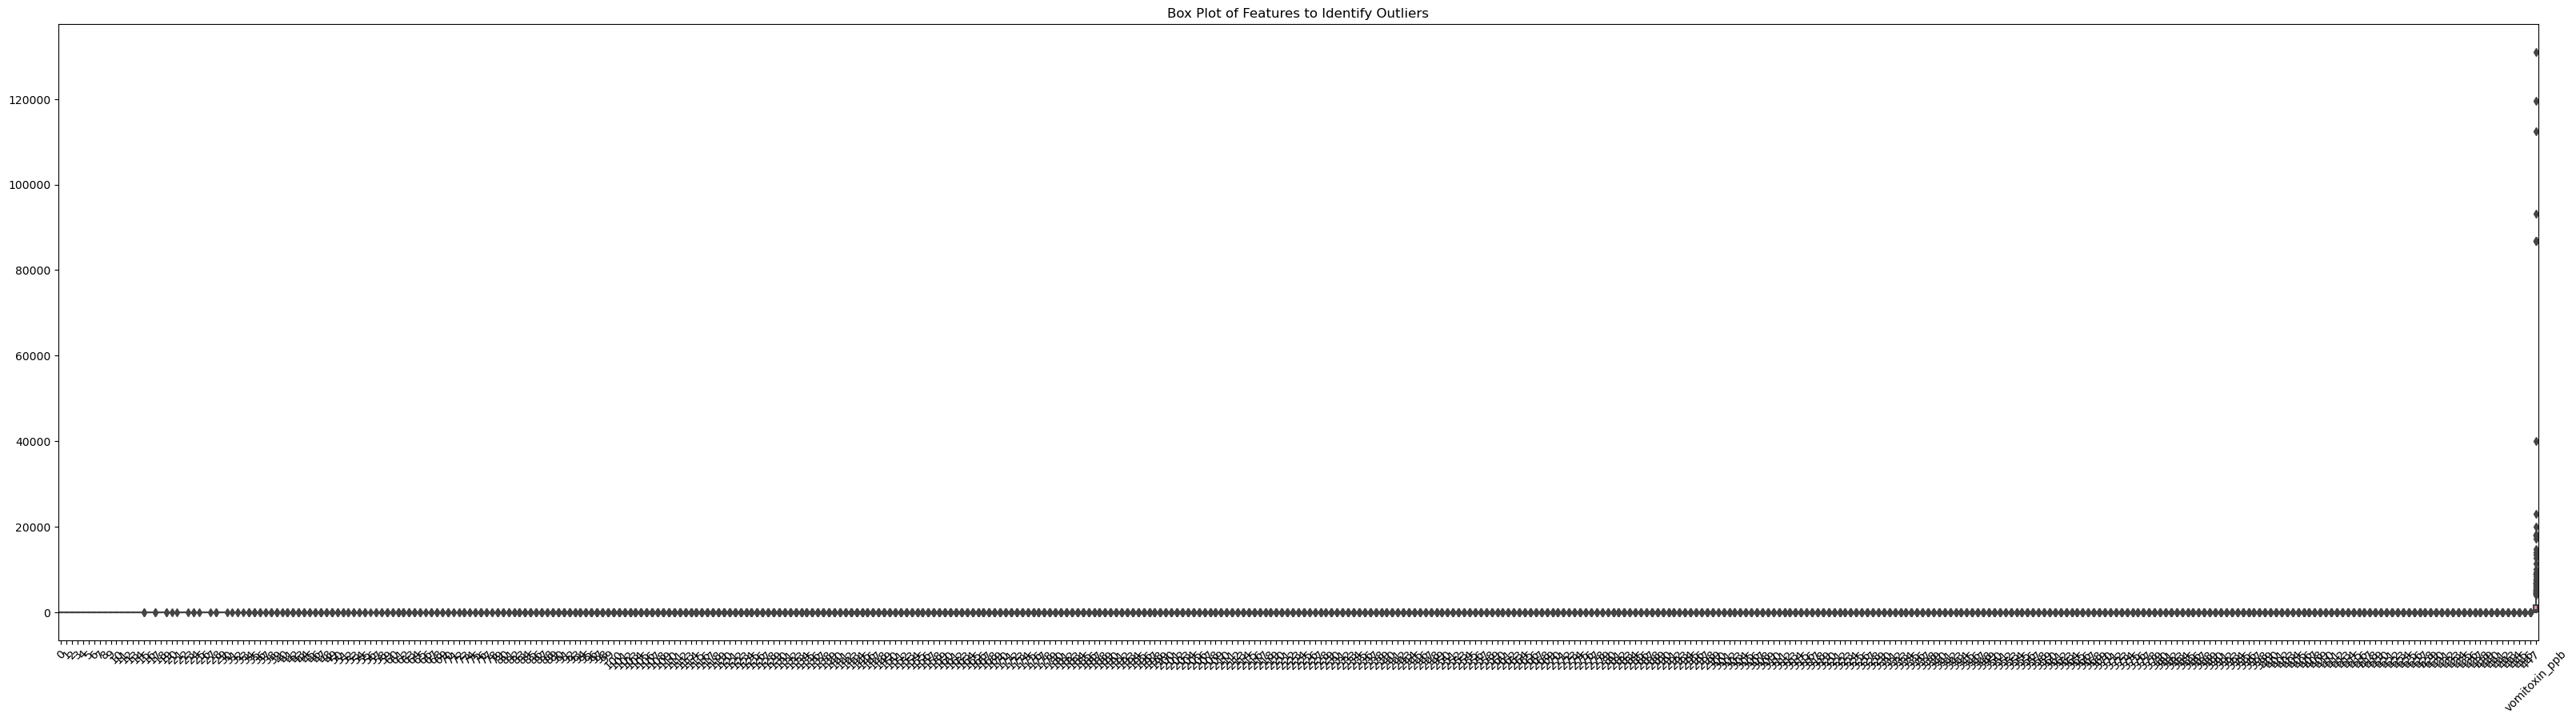

In [10]:
# Box plot to visualize outliers
plt.figure(figsize=(40, 10))
sns.boxplot(data=data_clean)
plt.title('Box Plot of Features to Identify Outliers')
plt.xticks(rotation=45)
plt.show()

**Above plot we can see i the last column having the outliers but thaat is our target column**

In [11]:
data_clean_fixed = data_clean.copy()
for col in data_clean.columns:
    median = data_clean[col].median()
    data_clean_fixed[col] = np.where(z_scores[col] > 3, median, data_clean[col])

print("\nData shape after replacing outliers with median:", data_clean_fixed.shape)



Data shape after replacing outliers with median: (500, 449)


In [12]:
data_clean_fixed.head()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,0.361567,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,0.359674,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,0.323854,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,0.413106,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,0.430482,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


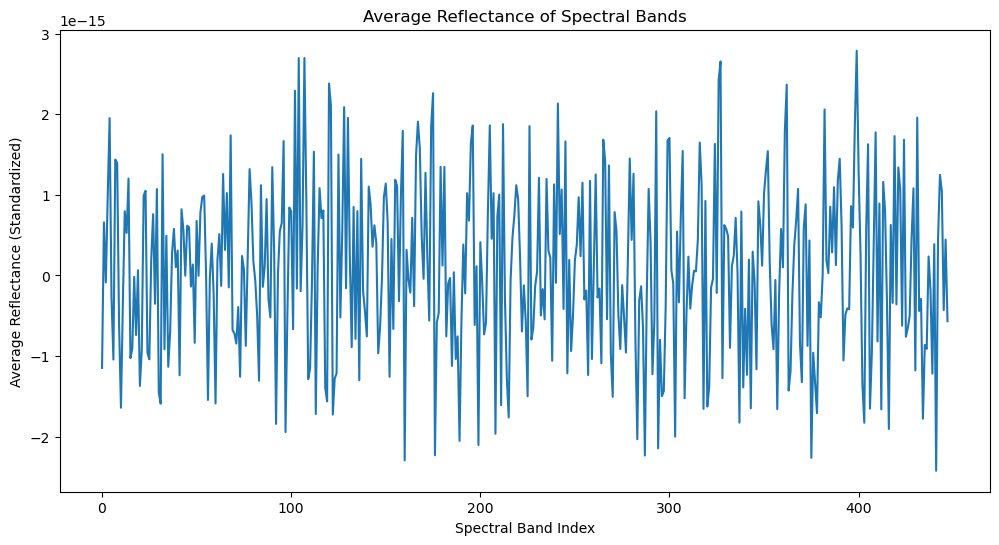

In [13]:
# Normalize/Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean_fixed.iloc[:, :-1])  # Exclude target column

# Visualize the spectral bands (average reflectance)
plt.figure(figsize=(12, 6))
plt.plot(data_scaled.mean(axis=0))
plt.title('Average Reflectance of Spectral Bands')
plt.xlabel('Spectral Band Index')
plt.ylabel('Average Reflectance (Standardized)')
plt.show()

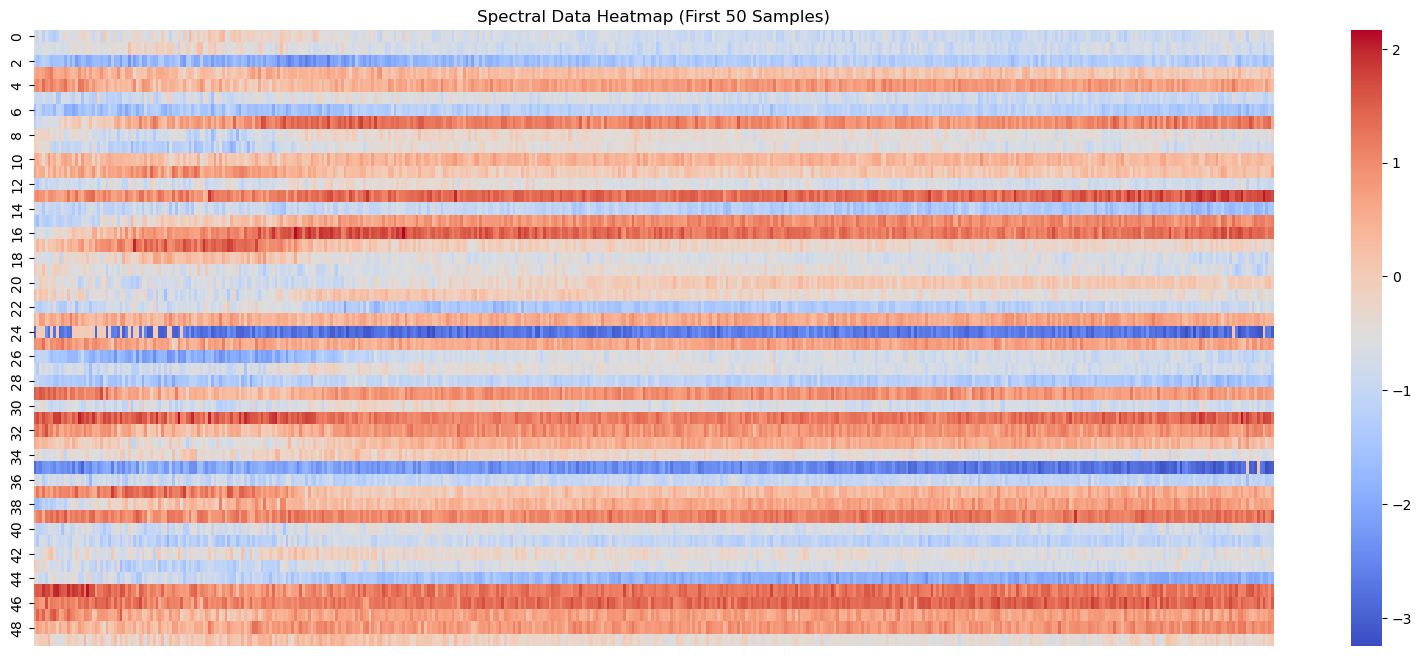

In [14]:
# Heatmap for sample comparison First 50 columns only
plt.figure(figsize=(20, 8))
sns.heatmap(data_scaled[:50], cmap='coolwarm', xticklabels=False)
plt.title('Spectral Data Heatmap (First 50 Samples)')
plt.show()


**======================Task - 2 - DIMENSIONALITY REDUCTION==========================**

In [15]:
# PCA
pca = PCA(n_components=20)
pca_result = pca.fit_transform(data_scaled)

In [16]:
# Variance explained by top components
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by Principal Components:", explained_variance)


Explained Variance by Principal Components: [8.35867651e-01 6.04801674e-02 2.70800359e-02 1.12298218e-02
 5.03967689e-03 2.88454011e-03 2.62090144e-03 2.53635174e-03
 1.85092455e-03 1.72511829e-03 1.41684162e-03 1.31648321e-03
 1.28218141e-03 1.12816513e-03 1.08507889e-03 1.01610367e-03
 9.43276435e-04 8.23058693e-04 6.60591921e-04 6.25889580e-04]


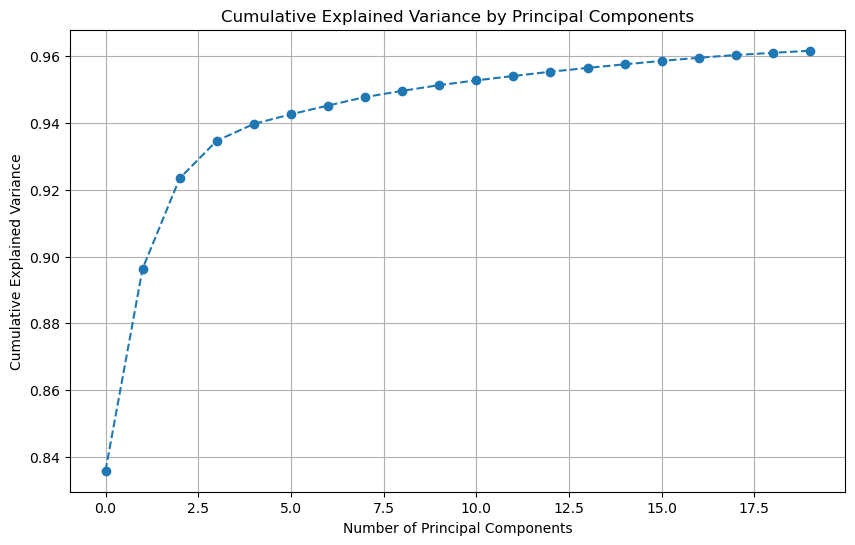

In [17]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [18]:
# PCA
pca = PCA(n_components=15)
pca_result = pca.fit_transform(data_scaled)

# Variance explained by top components
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by Principal Components:", explained_variance)


Explained Variance by Principal Components: [0.83586765 0.06048017 0.02708004 0.01122982 0.00503968 0.00288454
 0.0026209  0.00253635 0.00185092 0.00172512 0.00141684 0.00131648
 0.00128218 0.00112817 0.00108508]


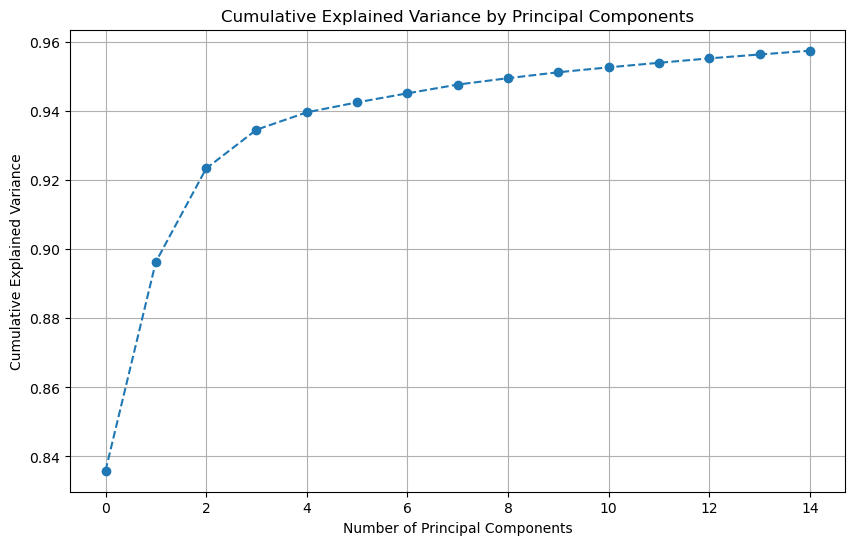

In [19]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [20]:
# Find the number of components explaining 95% variance
cum_variance = np.cumsum(explained_variance)
optimal_components = np.argmax(cum_variance >= 0.95) + 1
print(f"\nOptimal number of components for 95% variance: {optimal_components}")


Optimal number of components for 95% variance: 10


In [21]:
# PCA
pca = PCA(n_components=10)
pca_result = pca.fit_transform(data_scaled)

# Variance explained by top components
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance by Principal Components:", explained_variance)


Explained Variance by Principal Components: [0.83586765 0.06048017 0.02708004 0.01122982 0.00503968 0.00288454
 0.0026209  0.00253635 0.00185092 0.00172512]


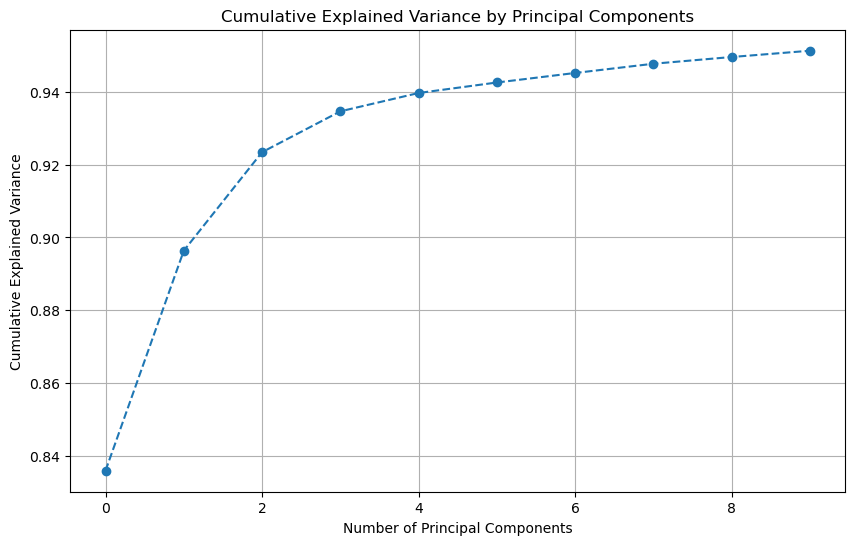

In [22]:
# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [23]:
pca_optimal = PCA(n_components=optimal_components)
pca_result_optimal = pca_optimal.fit_transform(data_scaled)

print(f"\nShape after PCA reduction: {pca_result_optimal.shape}")



Shape after PCA reduction: (500, 10)


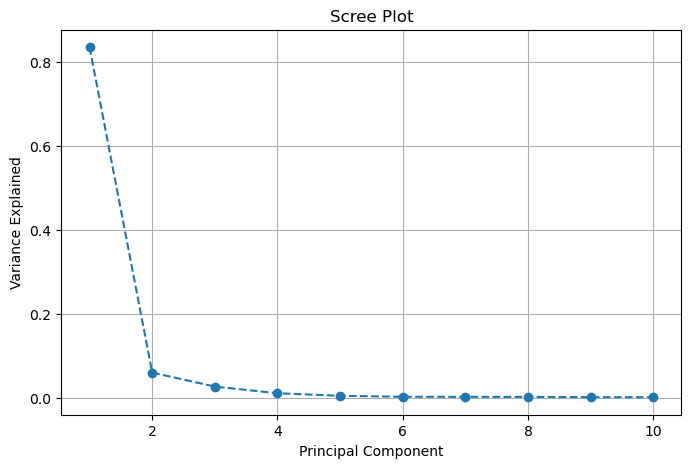

In [24]:
# Scree plot to show explained variance
explained_variance = pca_optimal.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid()
plt.show()

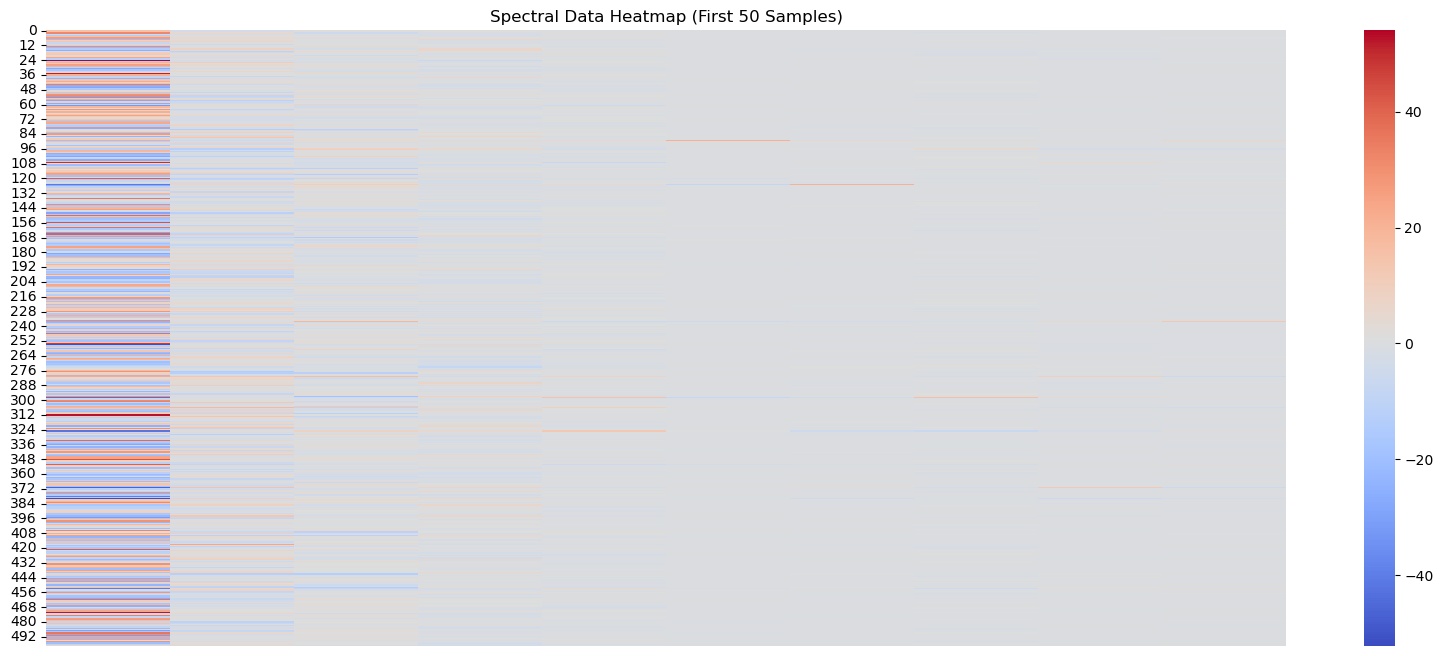

In [25]:
# Heatmap after PCA 
plt.figure(figsize=(20, 8))
sns.heatmap(pca_result_optimal, cmap='coolwarm', xticklabels=False)
plt.title('Spectral Data Heatmap (First 50 Samples)')
plt.show()


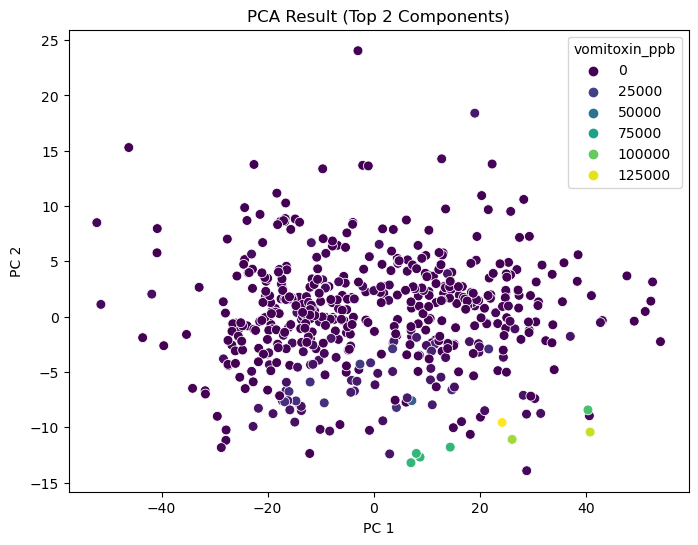

In [26]:
### 2D plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result_optimal[:, 0], y=pca_result_optimal[:, 1], hue=df['vomitoxin_ppb'], palette='viridis', s=50)
plt.title('PCA Result (Top 2 Components)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()


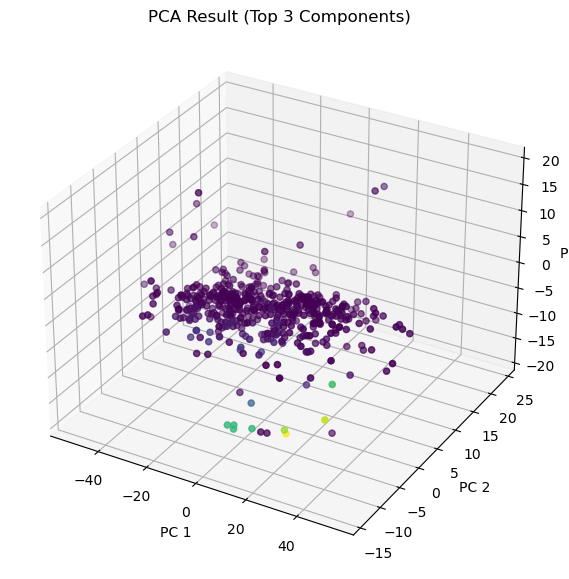

In [27]:
### 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result_optimal[:, 0], pca_result_optimal[:, 1], pca_result_optimal[:, 2], c=df['vomitoxin_ppb'], cmap='viridis')
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.title('PCA Result (Top 3 Components)')
plt.show()


**===========================Model Training===================================**

In [28]:
# Separate features and target
x = pca_result_optimal
y = df['vomitoxin_ppb'].values

In [29]:
# Split the data into training (80%) and testing (20%) sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((400, 10), (100, 10), (400,), (100,))

**Random Forest**

In [29]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [30]:
y_pred_train = rf.predict(x_train)
R2_train_rf = r2_score(y_train, y_pred_train)
MAE_train_rf = mean_absolute_error(y_train, y_pred_train)
MSE_train_rf = mean_squared_error(y_train, y_pred_train)
RMSE_train_rf = mean_squared_error(y_train, y_pred_train, squared=False)

print(f"R2 Score = {R2_train_rf}")
print(f"MAE = {MAE_train_rf}")
print(f"MSE = {MSE_train_rf}")
print(f"RMSE = {RMSE_train_rf}")

R2 Score = 0.9155854409541216
MAE = 1080.4033749999999
MSE = 12134481.739620252
RMSE = 3483.4583016910437


In [31]:
y_pred_test = rf.predict(x_test)
R2_test_rf = r2_score(y_test, y_pred_test)
MAE_test_rf = mean_absolute_error(y_test, y_pred_test)
MSE_test_rf = mean_squared_error(y_test, y_pred_test)
RMSE_test_rf = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"R2 Score = {R2_test_rf}")
print(f"MAE = {MAE_test_rf}")
print(f"MSE = {MSE_test_rf}")
print(f"RMSE = {RMSE_test_rf}")

R2 Score = 0.6639455341152696
MAE = 3138.9557
MSE = 93938350.98631102
RMSE = 9692.179888255841


**Hyperparameter Tunning RF**

In [32]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],         # Number of features to consider when looking for the best split
    'bootstrap': [True, False]                # Method for sampling data points
}

### Using GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)
print("Best Parameter :", grid_search.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Parameter : {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [33]:
rf_hyp = RandomForestRegressor(n_estimators = 50, min_samples_split = 2, min_samples_leaf = 1, 
                               max_features = 'sqrt', max_depth = 20, bootstrap = False)
rf_hyp.fit(x_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=20, max_features='sqrt',
                      n_estimators=50)

In [34]:
y_pred_train = rf_hyp.predict(x_train)
R2_train_rf_hyp = r2_score(y_train, y_pred_train)
MAE_train_rf_hyp = mean_absolute_error(y_train, y_pred_train)
MSE_train_rf_hyp = mean_squared_error(y_train, y_pred_train)
RMSE_train_rf_hyp = mean_squared_error(y_train, y_pred_train, squared=False)

print(f"R2 Score = {R2_train_rf_hyp}")
print(f"MAE = {MAE_train_rf_hyp}")
print(f"MSE = {MSE_train_rf_hyp}")
print(f"RMSE = {RMSE_train_rf_hyp}")

R2 Score = 0.9999984224217635
MAE = 8.527005131306602
MSE = 226.77479477549778
RMSE = 15.059043620877715


In [35]:
y_pred_test = rf_hyp.predict(x_test)
R2_test_rf_hyp = r2_score(y_test, y_pred_test)
MAE_test_rf_hyp = mean_absolute_error(y_test, y_pred_test)
MSE_test_rf_hyp = mean_squared_error(y_test, y_pred_test)
RMSE_test_rf_hyp = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"R2 Score = {R2_test_rf_hyp}")
print(f"MAE = {MAE_test_rf_hyp}")
print(f"MSE = {MSE_test_rf_hyp}")
print(f"RMSE = {RMSE_test_rf_hyp}")

R2 Score = 0.6327184220179207
MAE = 3348.07055773932
MSE = 102667362.8408829
RMSE = 10132.490455997622


**XGboost**

In [30]:
xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [31]:
y_pred_train = xg.predict(x_train)
R2_train_xg = r2_score(y_train, y_pred_train)
MAE_train_xg = mean_absolute_error(y_train, y_pred_train)
MSE_train_xg = mean_squared_error(y_train, y_pred_train)
RMSE_train_xg = mean_squared_error(y_train, y_pred_train, squared=False)

print(f"R2 Score = {R2_train_xg}")
print(f"MAE = {MAE_train_xg}")
print(f"MSE = {MSE_train_xg}")
print(f"RMSE = {RMSE_train_xg}")

R2 Score = 0.9999999026408132
MAE = 2.527725862786174
MSE = 13.995254936802615
RMSE = 3.741023247295132


In [32]:
y_pred_test = xg.predict(x_test)
R2_test_xg = r2_score(y_test, y_pred_test)
MAE_test_xg = mean_absolute_error(y_test, y_pred_test)
MSE_test_xg = mean_squared_error(y_test, y_pred_test)
RMSE_test_xg = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"R2 Score = {R2_test_xg}")
print(f"MAE = {MAE_test_xg}")
print(f"MSE = {MSE_test_xg}")
print(f"RMSE = {RMSE_test_xg}")

R2 Score = 0.6903026273255708
MAE = 2582.428435258865
MSE = 86570670.6716043
RMSE = 9304.336122024199


**Hyperparameter Tunning XGBOOST**

In [39]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best Parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 19683 candidates, totalling 59049 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 300, 'reg_alpha': 0.1, 'reg_lambda': 1.5, 'subsample': 0.6}


In [40]:
xg_hyp = XGBRegressor(subsample = 0.6, reg_lambda = 1.5, reg_alpha = 0.1, n_estimators = 300, max_depth = 3,
                      min_child_weight = 5, learning_rate = 0.2, gamma = 0, colsample_bytree = 1.0)
xg_hyp.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [41]:
y_pred_train = xg_hyp.predict(x_train)
R2_train_xg_hyp = r2_score(y_train, y_pred_train)
MAE_train_xg_hyp = mean_absolute_error(y_train, y_pred_train)
MSE_train_xg_hyp = mean_squared_error(y_train, y_pred_train)
RMSE_train_xg_hyp = mean_squared_error(y_train, y_pred_train, squared=False)

print(f"R2 Score = {R2_train_xg_hyp}")
print(f"MAE = {MAE_train_xg_hyp}")
print(f"MSE = {MSE_train_xg_hyp}")
print(f"RMSE = {RMSE_train_xg_hyp}")

R2 Score = 0.997397949440599
MAE = 458.7379974365234
MSE = 374041.34257765027
RMSE = 611.5891942943812


In [42]:
y_pred_test = xg_hyp.predict(x_test)
R2_test_xg_hyp = r2_score(y_test, y_pred_test)
MAE_test_xg_hyp = mean_absolute_error(y_test, y_pred_test)
MSE_test_xg_hyp = mean_squared_error(y_test, y_pred_test)
RMSE_test_xg_hyp = mean_squared_error(y_test, y_pred_test, squared=False)

print(f"R2 Score = {R2_test_xg_hyp}")
print(f"MAE = {MAE_test_xg_hyp}")
print(f"MSE = {MSE_test_xg_hyp}")
print(f"RMSE = {RMSE_test_xg_hyp}")

R2 Score = 0.688050158085289
MAE = 3572.2801047182083
MSE = 87200310.41027704
RMSE = 9338.110644572436


**CNN Model**

In [43]:
X = pca_result_optimal.reshape(-1, pca_result_optimal.shape[1], 1)
y = df['vomitoxin_ppb'].values

In [44]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 10, 1), (100, 10, 1), (400,), (100,))

In [45]:
# Step 1: Reshape X_train for CNN (Adding channel dimension)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# Define an improved CNN model with regularization to prevent overfitting
cnn_model_fixed = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(X_train_cnn.shape[1], 1)),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling1D(pool_size=2, strides=2),
    layers.Dropout(0.4),  # Increased dropout

    layers.Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.MaxPooling1D(pool_size=2, strides=2),
    layers.Dropout(0.4),  # Another dropout layer

    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.5),  # Strong dropout in dense layers
    layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(1)  # Output layer for regression
])

In [46]:
# Compile the model with early stopping
cnn_model_fixed.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Set up Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history_fixed = cnn_model_fixed.fit(X_train_cnn, y_train,
                                    epochs=50, batch_size=16,
                                    validation_split=0.2, verbose=1,
                                    callbacks=[early_stopping])

# Evaluate on test data
test_loss_fixed, test_mae_fixed = cnn_model_fixed.evaluate(X_test_cnn, y_test)

# Return test performance
test_mae_fixed

Epoch 1/50
20/20 [==============================] - 1s 18ms/step - loss: 141283424.0000 - mae: 2921.7825 - val_loss: 203014560.0000 - val_mae: 4076.2449
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 140788256.0000 - mae: 2872.6067 - val_loss: 198709824.0000 - val_mae: 3920.1069
Epoch 3/50
20/20 [==============================] - 0s 4ms/step - loss: 133516528.0000 - mae: 3052.0942 - val_loss: 182642624.0000 - val_mae: 4239.3350
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 129590168.0000 - mae: 4300.6748 - val_loss: 175517216.0000 - val_mae: 4414.9717
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 127166416.0000 - mae: 3587.7625 - val_loss: 178957504.0000 - val_mae: 4093.6484
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 124643224.0000 - mae: 3518.5249 - val_loss: 170018096.0000 - val_mae: 4399.2466
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 124250160.0000 

3566.17041015625

In [47]:
# Predictions on training set
y_pred_train = cnn_model_fixed.predict(X_train)

# Training Metrics
R2_train_cnn = r2_score(y_train, y_pred_train)
MAE_train_cnn = mean_absolute_error(y_train, y_pred_train)
MSE_train_cnn = mean_squared_error(y_train, y_pred_train)
RMSE_train_cnn = mean_squared_error(y_train, y_pred_train)

print(f"\nTraining Metrics:")
print(f"R2 Score = {R2_train_cnn:.4f}")
print(f"MAE = {MAE_train_cnn:.4f}")
print(f"MSE = {MSE_train_cnn:.4f}")
print(f"RMSE = {RMSE_train_cnn:.4f}")

13/13 [==============================] - 0s 1ms/step

Training Metrics:
R2 Score = 0.6395
MAE = 2621.7966
MSE = 51825033.3455
RMSE = 51825033.3455


In [48]:
# Predictions on test set
y_pred_test = cnn_model_fixed.predict(X_test)

# Test Metrics
R2_test_cnn = r2_score(y_test, y_pred_test)
MAE_test_cnn = mean_absolute_error(y_test, y_pred_test)
MSE_test_cnn = mean_squared_error(y_test, y_pred_test)
RMSE_test_cnn = mean_squared_error(y_test, y_pred_test)

print(f"\nTest Metrics:")
print(f"R2 Score = {R2_test_cnn:.4f}")
print(f"MAE = {MAE_test_cnn:.4f}")
print(f"MSE = {MSE_test_cnn:.4f}")
print(f"RMSE = {RMSE_test_cnn:.4f}")

4/4 [==============================] - 0s 6ms/step

Test Metrics:
R2 Score = 0.7038
MAE = 3566.1704
MSE = 82791870.1464
RMSE = 82791870.1464


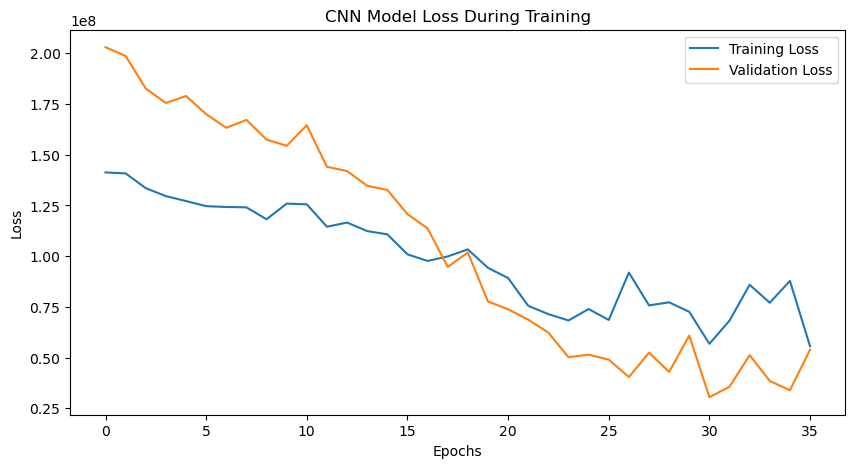

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history_fixed.history['loss'], label='Training Loss')
plt.plot(history_fixed.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**LSTM**

In [51]:
# Step 1: Reshape Data for LSTM (LSTMs require 3D input: [samples, timesteps, features])
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Step 2: Define LSTM Model
lstm_model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)),
    Dropout(0.3),

    LSTM(32, activation='relu', return_sequences=False),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

In [52]:
# Step 3: Compile the Model
lstm_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 4: Train the Model with Early Stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history_lstm = lstm_model.fit(X_train_lstm, y_train,
                              epochs=50, batch_size=16,
                              validation_split=0.2, verbose=1,
                              callbacks=[early_stopping])

# Step 5: Evaluate on Test Data
test_loss_lstm, test_mae_lstm = lstm_model.evaluate(X_test_lstm, y_test)

# Return final test MAE as performance measure
test_mae_lstm

Epoch 1/50
20/20 [==============================] - 2s 21ms/step - loss: 141349792.0000 - mae: 2926.6147 - val_loss: 203230176.0000 - val_mae: 4088.2102
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 140534576.0000 - mae: 2925.0100 - val_loss: 201754144.0000 - val_mae: 4013.3989
Epoch 3/50
20/20 [==============================] - 0s 7ms/step - loss: 139234752.0000 - mae: 3159.5024 - val_loss: 199065600.0000 - val_mae: 3938.8118
Epoch 4/50
20/20 [==============================] - 0s 7ms/step - loss: 134523312.0000 - mae: 3033.8982 - val_loss: 191948960.0000 - val_mae: 4020.8931
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 130201104.0000 - mae: 3714.0286 - val_loss: 189431600.0000 - val_mae: 4021.6851
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 128061104.0000 - mae: 3166.0767 - val_loss: 186100272.0000 - val_mae: 4007.7466
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 124266384.0000 

3754.359619140625

In [53]:
# Predictions on training set
y_pred_train = lstm_model.predict(X_train)

# Training Metrics
R2_train_lstm = r2_score(y_train, y_pred_train)
MAE_train_lstm = mean_absolute_error(y_train, y_pred_train)
MSE_train_lstm = mean_squared_error(y_train, y_pred_train)
RMSE_train_lstm = mean_squared_error(y_train, y_pred_train)

print(f"\nTraining Metrics:")
print(f"R2 Score = {R2_train_lstm:.4f}")
print(f"MAE = {MAE_train_lstm:.4f}")
print(f"MSE = {MSE_train_lstm:.4f}")
print(f"RMSE = {RMSE_train_lstm:.4f}")

13/13 [==============================] - 0s 2ms/step

Training Metrics:
R2 Score = 0.6020
MAE = 2921.6746
MSE = 57206416.4952
RMSE = 57206416.4952


In [54]:
# Predictions on test set
y_pred_test = lstm_model.predict(X_test)

# Test Metrics
R2_test_lstm = r2_score(y_test, y_pred_test)
MAE_test_lstm = mean_absolute_error(y_test, y_pred_test)
MSE_test_lstm = mean_squared_error(y_test, y_pred_test)
RMSE_test_lstm = mean_squared_error(y_test, y_pred_test)

print(f"\nTest Metrics:")
print(f"R2 Score = {R2_test_lstm:.4f}")
print(f"MAE = {MAE_test_lstm:.4f}")
print(f"MSE = {MSE_test_lstm:.4f}")
print(f"RMSE = {RMSE_test_lstm:.4f}")

4/4 [==============================] - 0s 5ms/step

Test Metrics:
R2 Score = 0.6326
MAE = 3754.3595
MSE = 102704120.2580
RMSE = 102704120.2580


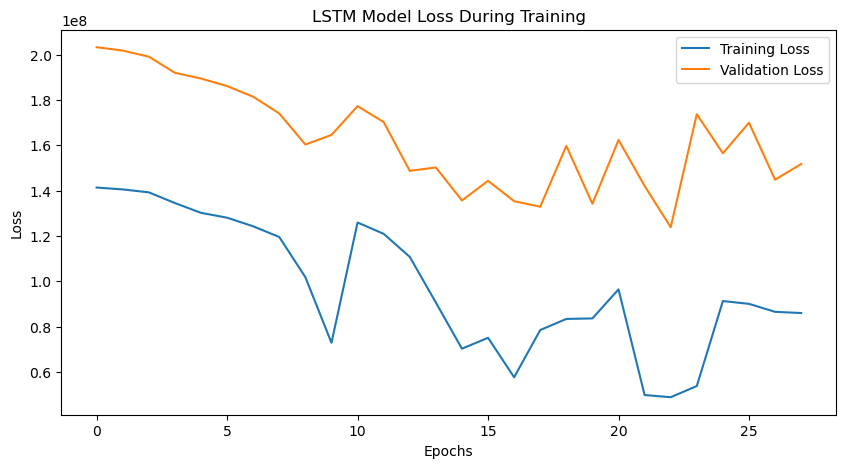

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()